# Customer Segmentation - Unsupervised Machine Learning Project

## Project Description

The goal of this project is to analyze customer data from a retail store in order to better understand customer behaviors, needs, and purchasing patterns. By applying unsupervised machine learning techniques, we aim to group similar customers into meaningful segments that can support business decision-making and targeted marketing strategies.

We will work with a dataset containing demographic information, purchasing habits, and marketing activity of the customers.

## Tasks Overview

The following unsupervised learning methods will be applied:

- **Data Preparation**  
  Data cleaning, handling missing values, encoding categorical variables, outlier detection, feature scaling.

- **Clustering Approaches**  
  - **K-Means Clustering**
  - **Hierarchical Agglomerative Clustering**
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

- **Feature Engineering**  
  Creating new customer features to improve clustering quality.

- **Dimensionality Reduction**  
  Applying PCA (Principal Component Analysis) to reduce feature space.

- **Cluster Evaluation**  
  Using multiple evaluation metrics:
  - Silhouette Score
  - Davies-Bouldin Index
  - Calinski-Harabasz Index

- **Visualization & Interpretation**  
  Analyzing and interpreting the discovered customer segments to draw business conclusions.

---

This project is part of the final assignment for the course:  
**Advanced Machine Learning with Scikit-learn**

Instructor: Andrzej Bobyk  
Year: 2025



In [12]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearOfBirth          2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   MaritalStatus        2240 non-null   object 
 3   Income               2216 non-null   float64
 4   KidsHome             2240 non-null   int64  
 5   TeensHome            2240 non-null   int64  
 6   CustomerFrom         2240 non-null   object 
 7   DaysLastPurchase     2240 non-null   int64  
 8   AmountWines          2240 non-null   int64  
 9   AmountFruits         2240 non-null   int64  
 10  AmountMeat           2240 non-null   int64  
 11  AmountFish           2240 non-null   int64  
 12  AmountSweets         2240 non-null   int64  
 13  AmountGoldProds      2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases     

/tmp/ipykernel_12194/3225701328.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


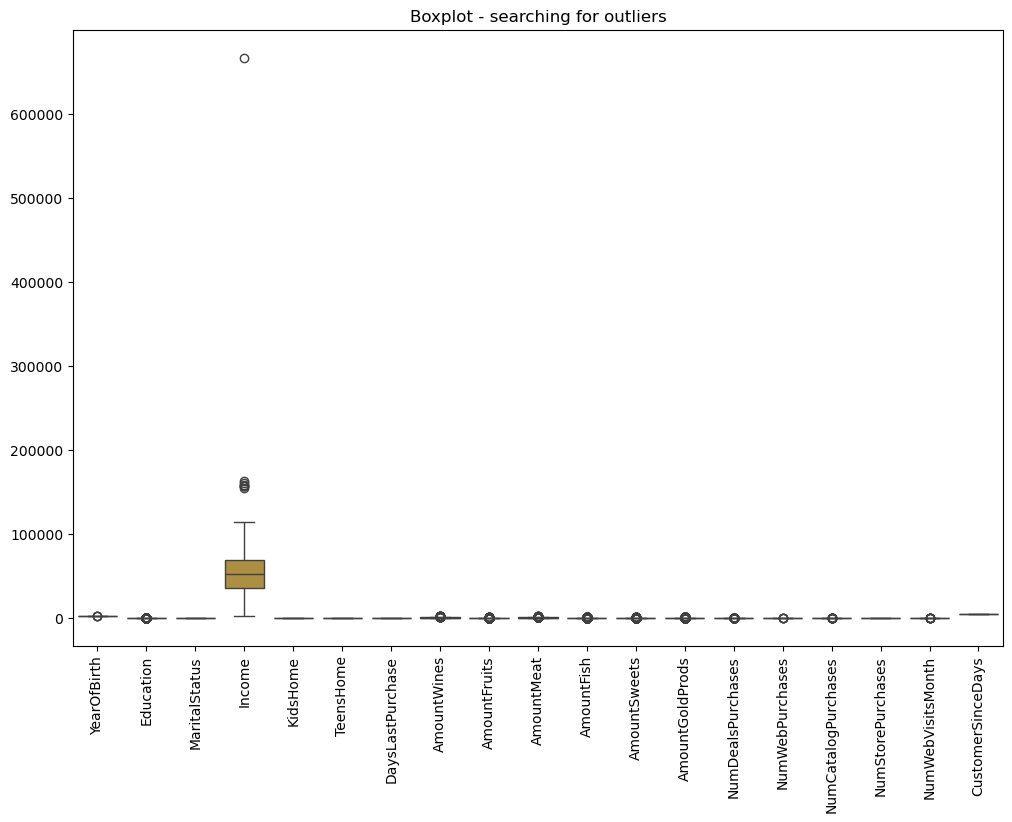


Sample of scaled data:
   YearOfBirth  Education  MaritalStatus    Income  KidsHome  TeensHome  \
0    -0.985345  -0.350141       0.251004  0.235696 -0.825218  -0.929894   
1    -1.235733  -0.350141       0.251004 -0.235454  1.032559   0.906934   
2    -0.317643  -0.350141       1.180340  0.773999 -0.825218  -0.929894   
3     1.268149  -0.350141       1.180340 -1.022355  1.032559  -0.929894   
4     1.017761   1.428354      -0.678332  0.241888  1.032559  -0.929894   

   DaysLastPurchase  AmountWines  AmountFruits  AmountMeat  AmountFish  \
0          0.307039     0.983781      1.551577    1.679702    2.462147   
1         -0.383664    -0.870479     -0.636301   -0.713225   -0.650449   
2         -0.798086     0.362723      0.570804   -0.177032    1.345274   
3         -0.798086    -0.870479     -0.560857   -0.651187   -0.503974   
4          1.550305    -0.389085      0.419916   -0.216914    0.155164   

   AmountSweets  AmountGoldProds  NumDealsPurchases  NumWebPurchases  \
0      1

In [13]:
# Loading the dataset
df = pd.read_csv("marketing_campaign.csv")

# Basic information about the data
print("Data information:")
df.info()
print("\nDescriptive statistics:")
print(df.describe(include='all'))
print("\nMissing values:")
print(df.isnull().sum())

# Handling missing values by filling with median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Transforming CustomerFrom into CustomerSinceDays (format: DD-MM-YYYY)
df['CustomerFrom'] = pd.to_datetime(df['CustomerFrom'], format='%d-%m-%Y')
df['CustomerSinceDays'] = (datetime.today() - df['CustomerFrom']).dt.days

# Dropping the original date column
df.drop('CustomerFrom', axis=1, inplace=True)

# Encoding categorical variables
categorical_cols = ['Education', 'MaritalStatus']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Initial outlier visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplot - searching for outliers")
plt.show()

# Scaling numeric data for further clustering
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Preview of the scaled data
print("\nSample of scaled data:")
print(df_scaled.head())


### Task 2: Clustering – First Approach

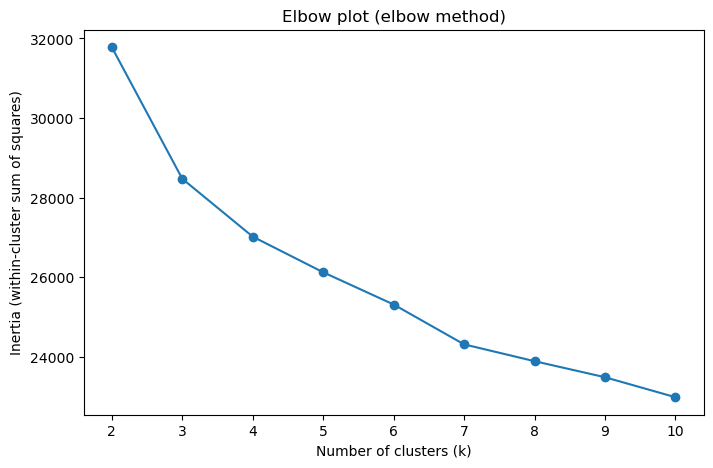

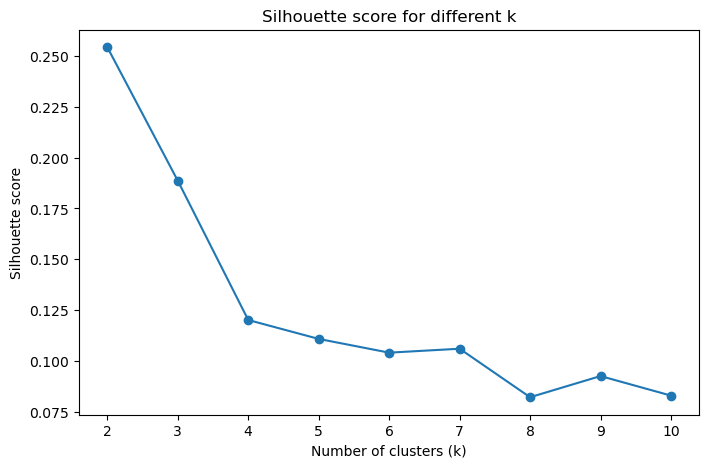

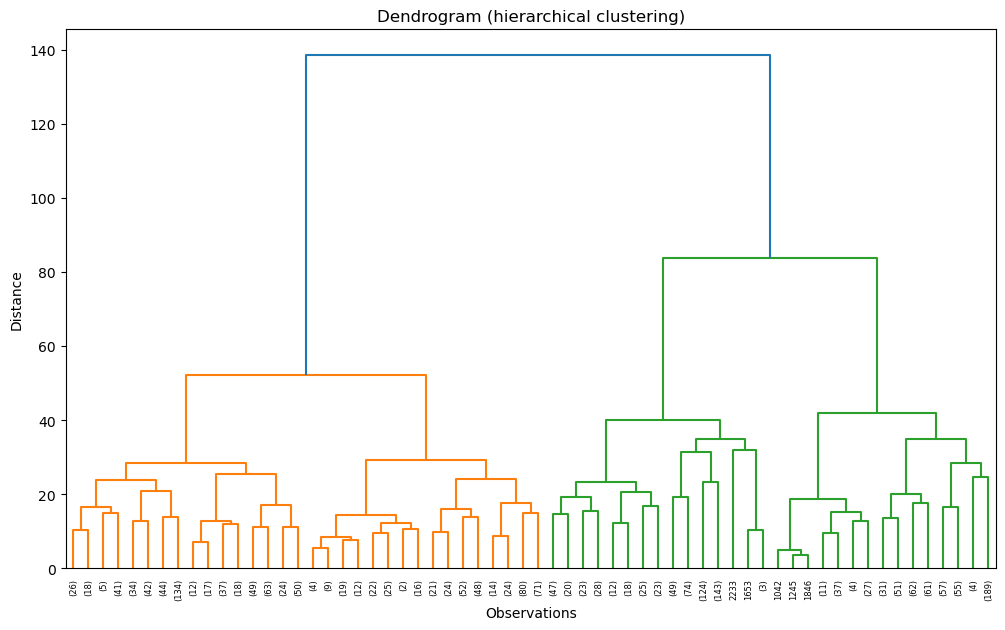

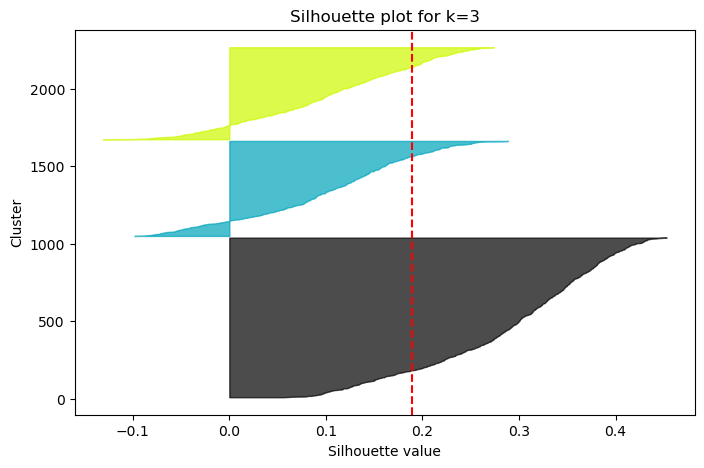

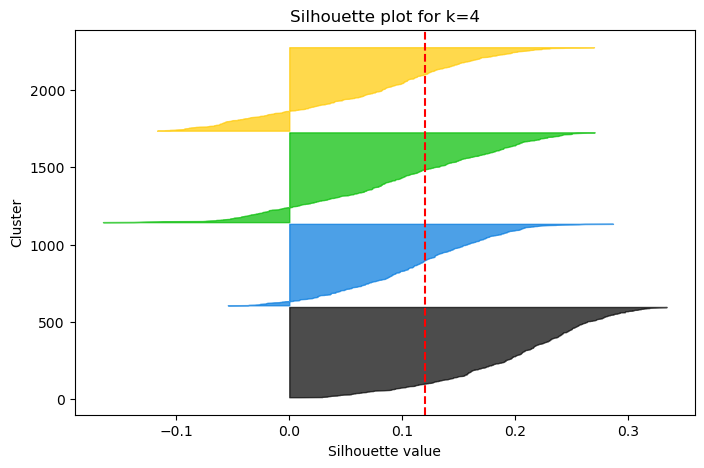

In [14]:
# KMeans - inertia analysis (elbow method)
inertia_list = []
K = range(2, 11)  # testing k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow plot (elbow method)')
plt.show()

# KMeans - silhouette score for different k values
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different k')
plt.show()

# Hierarchical clustering - dendrogram
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (hierarchical clustering)')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# Silhouette plots for selected k values

def plot_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)

    plt.figure(figsize=(8,5))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.xlabel("Silhouette value")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette plot for k={k}")
    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.show()

# Plotting for k=3 and k=4
plot_silhouette(3)
plot_silhouette(4)


### Clustering Analysis Conclusions (Task 2)

- The largest drop in inertia (elbow method) is observed for k=3-4.
- The highest silhouette score occurs at k=2 and k=3, with a noticeable decline afterwards.
- The dendrogram suggests splitting into 2 groups.
- Silhouette plots show better cluster separation at k=3.
- For further analysis, **3 clusters** were selected as the optimal number of groups.


### Task 3: Clustering – Second Approach (DBSCAN)

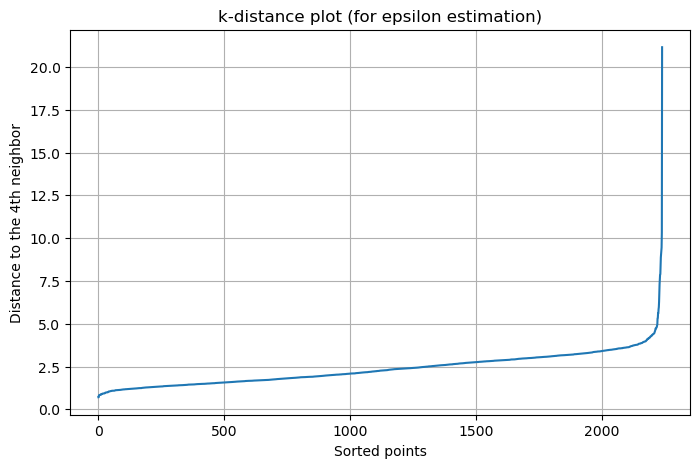

Top DBSCAN parameter combinations for 3 clusters:
    eps  minpts  silhouette
1  0.97       5   -0.180420
3  0.98       6   -0.183942
2  0.97       6   -0.183942
4  0.99       6   -0.183942
0  0.83       4   -0.190404

Best DBSCAN parameters: eps=0.9699999999999995, min_samples=5
Number of clusters: 3
Number of noise points: 2213
Silhouette score: -0.1804
Davies-Bouldin score: 1.4121
Calinski-Harabasz score: 5.81


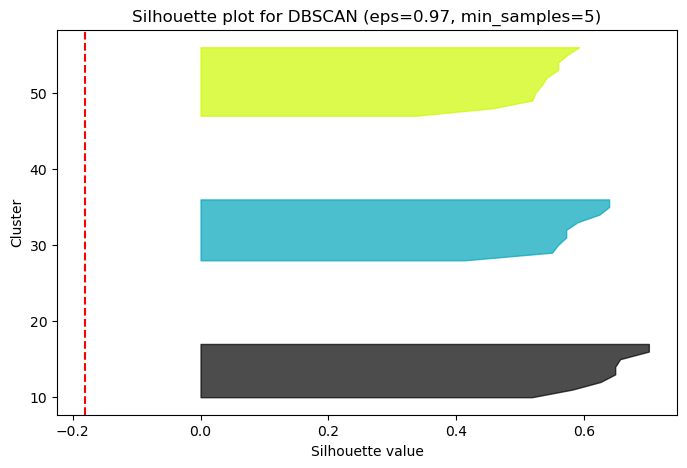

In [15]:
# k-distance plot to estimate epsilon
k = 4  # MinPts - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
k_distances = np.sort(distances[:, k-1])  # distances to the k-th nearest neighbor

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.title("k-distance plot (for epsilon estimation)")
plt.xlabel("Sorted points")
plt.ylabel(f"Distance to the {k}th neighbor")
plt.grid()
plt.show()

# Iteratively test different epsilon and MinPts values
results = []
eps_range = np.arange(0.1, 1.0, 0.01)
minpts_range = range(2, 9)

for eps in eps_range:
    for minpts in minpts_range:
        dbscan = DBSCAN(eps=eps, min_samples=minpts)
        labels = dbscan.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # We assume 3 clusters based on previous analysis
        if n_clusters == 3:
            score = silhouette_score(df_scaled, labels)
            results.append((eps, minpts, score))

# Find best parameters
results_df = pd.DataFrame(results, columns=['eps', 'minpts', 'silhouette'])
results_df = results_df.sort_values(by='silhouette', ascending=False)
print("Top DBSCAN parameter combinations for 3 clusters:")
print(results_df.head())

# Run DBSCAN with best parameters
best_eps = results_df.iloc[0]['eps']
best_minpts = int(results_df.iloc[0]['minpts'])

dbscan = DBSCAN(eps=best_eps, min_samples=best_minpts)
labels = dbscan.fit_predict(df_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

sil_score = silhouette_score(df_scaled, labels)
db_score = davies_bouldin_score(df_scaled, labels)
ch_score = calinski_harabasz_score(df_scaled, labels)

print(f"\nBest DBSCAN parameters: eps={best_eps}, min_samples={best_minpts}")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Silhouette score: {sil_score:.4f}")
print(f"Davies-Bouldin score: {db_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.2f}")

# Silhouette plot for DBSCAN
sil_vals = silhouette_samples(df_scaled, labels)

plt.figure(figsize=(8,5))
y_lower = 10
for i in range(n_clusters):
    ith_vals = sil_vals[labels == i]
    ith_vals.sort()
    size_i = ith_vals.shape[0]
    y_upper = y_lower + size_i
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
plt.xlabel("Silhouette value")
plt.ylabel("Cluster")
plt.title(f"Silhouette plot for DBSCAN (eps={best_eps:.2f}, min_samples={best_minpts})")
plt.axvline(x=np.mean(sil_vals), color="red", linestyle="--")
plt.show()


### DBSCAN Analysis Conclusions (Task 3)

- Best result found for: `eps = 0.97`, `min_samples = 5`.
- DBSCAN detected:
  - 3 clusters,
  - 2213 noise points,
  - silhouette score: `-0.1804` (low, indicating poor cluster separation),
  - Davies-Bouldin index: `1.41`,
  - Calinski-Harabasz index: `5.81`.

#### Summary:
- Despite finding the correct number of clusters, most points were classified as noise.
- Cluster quality metrics are worse than with K-Means.
- DBSCAN did not perform well on this dataset — likely due to lack of clear, dense structures, which limits the effectiveness of this density-based algorithm.


### Task 4: Clustering – Third Approach (Feature Engineering)


New shape after feature engineering: (2240, 15)

KMeans — silhouette: 0.20348132848318734
KMeans — DB index: 1.8009938000080048
KMeans — CH index: 593.4713437772888

DBSCAN (reduced) — clusters: 1
DBSCAN (reduced) — noise points: 2234
DBSCAN (reduced) — silhouette: -0.1327186516939383
DBSCAN (reduced) — DB index: 1.5032084678720374
DBSCAN (reduced) — CH index: 3.377502029845758


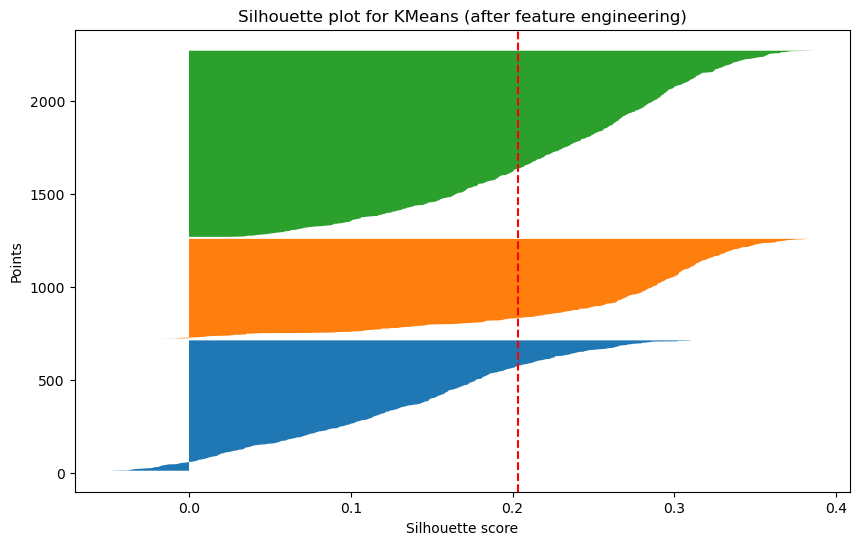

In [16]:
# Creating new features
df['Spent'] = df[['AmountWines', 'AmountFruits', 'AmountMeat', 'AmountFish', 'AmountSweets', 'AmountGoldProds']].sum(axis=1)
df['Children'] = df['KidsHome'] + df['TeensHome']
df['FamilySize'] = df['Children'] + 2
df['IsParent'] = (df['Children'] > 0).astype(int)

# Drop original columns used to build the new features
drop_cols = ['AmountWines', 'AmountFruits', 'AmountMeat', 'AmountFish', 'AmountSweets', 'AmountGoldProds', 'KidsHome', 'TeensHome']
df_reduced = df.drop(columns=drop_cols)

# Scale the new dataset
df_reduced_scaled = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns)
print("\nNew shape after feature engineering:", df_reduced_scaled.shape)

# Clustering again — KMeans and DBSCAN
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(df_reduced_scaled)
kmeans_sil = silhouette_score(df_reduced_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(df_reduced_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_reduced_scaled, kmeans_labels)

print("\nKMeans — silhouette:", kmeans_sil)
print("KMeans — DB index:", kmeans_db)
print("KMeans — CH index:", kmeans_ch)

# DBSCAN with estimated parameters
dbscan2 = DBSCAN(eps=0.9, min_samples=5)
dbscan2_labels = dbscan2.fit_predict(df_reduced_scaled)
n_clusters_db2 = len(set(dbscan2_labels)) - (1 if -1 in dbscan2_labels else 0)
n_noise_db2 = list(dbscan2_labels).count(-1)

dbscan2_sil = silhouette_score(df_reduced_scaled, dbscan2_labels)
dbscan2_db = davies_bouldin_score(df_reduced_scaled, dbscan2_labels)
dbscan2_ch = calinski_harabasz_score(df_reduced_scaled, dbscan2_labels)

print("\nDBSCAN (reduced) — clusters:", n_clusters_db2)
print("DBSCAN (reduced) — noise points:", n_noise_db2)
print("DBSCAN (reduced) — silhouette:", dbscan2_sil)
print("DBSCAN (reduced) — DB index:", dbscan2_db)
print("DBSCAN (reduced) — CH index:", dbscan2_ch)

# Silhouette plot for KMeans
sil_vals_km = silhouette_samples(df_reduced_scaled, kmeans_labels)
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(3):
    cluster_sil_vals = sil_vals_km[kmeans_labels == i]
    cluster_sil_vals.sort()
    size_cluster_i = cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    y_lower = y_upper + 10

plt.axvline(x=np.mean(sil_vals_km), color="red", linestyle="--")
plt.xlabel("Silhouette score")
plt.ylabel("Points")
plt.title("Silhouette plot for KMeans (after feature engineering)")
plt.show()


### Conclusions from Feature Engineering (Task 4)

- The new dataset, after adding features (`Spent`, `Children`, `FamilySize`, `IsParent`), has shape: **(2240, 15)** — fewer columns but more concentrated client information.
- **KMeans (k=3)**:
  - silhouette score: **0.2035**
  - Davies-Bouldin index: **1.80**
  - Calinski-Harabasz index: **593.47**
  - The silhouette plot indicates a reasonable, although moderate, separation
- **DBSCAN**:
  - silhouette score: **-0.1327**
  - Davies-Bouldin index: **1.50**
  - Calinski-Harabasz index: **3.377**
  - number of clusters: **1**
  - number of noise points: **2234 out of 2240** (almost all)
  - These results suggest that DBSCAN did not detect meaningful structure in the engineered dataset

#### Summary:
- Feature engineering simplified the dataset and reduced dimensionality while preserving key information
- **KMeans outperformed DBSCAN**, suggesting the data does not contain dense regions suitable for DBSCAN
- The final KMeans segmentation can be used for deeper interpretation of customer segments


### Task 5: Clustering – Fourth Approach (PCA + Clustering)


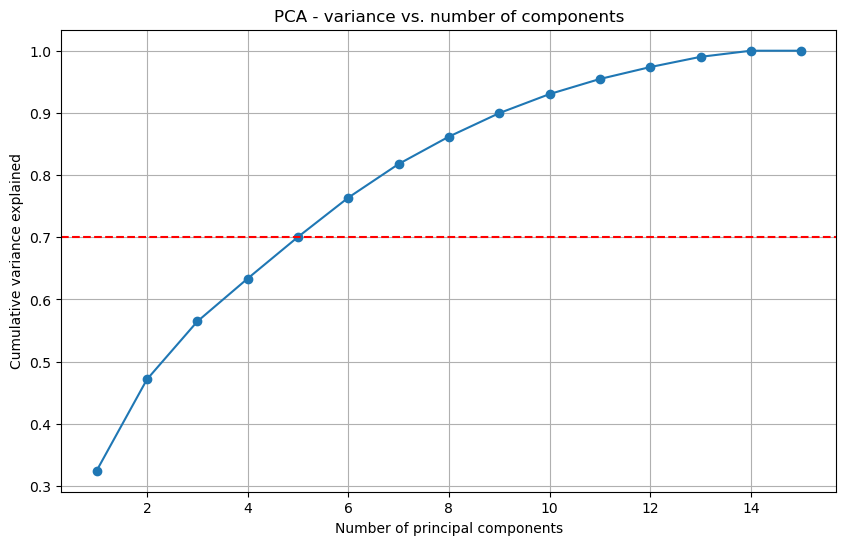


PCA + KMeans
Silhouette: 0.22018026985222677
DB index: 1.6765404792878222
CH index: 693.8615760691857

PCA + DBSCAN
Clusters: 10
Noise points: 2164
Silhouette: -0.22560445850767585
DB index: 1.4342811604285384
CH index: 5.049744414748238


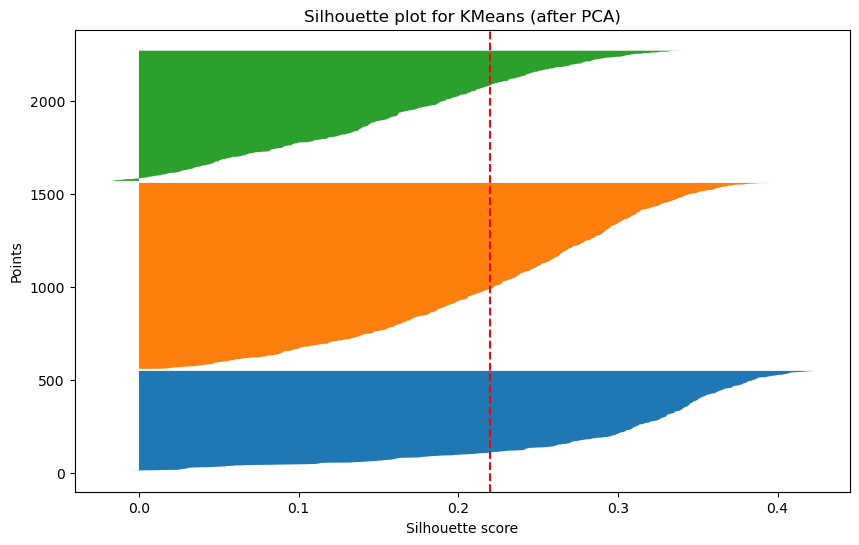

In [17]:
# PCA + clustering
total_features = df_reduced_scaled.shape[1]
explained_variance = []

for i in range(1, total_features + 1):
    pca = PCA(n_components=i)
    pca.fit(df_reduced_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(range(1, total_features + 1), explained_variance, marker='o')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA - variance vs. number of components")
plt.grid()
plt.show()

# PCA transformation: 9 components explain ~70% variance
pca_final = PCA(n_components=9)
df_pca_final = pca_final.fit_transform(df_reduced_scaled)

# KMeans clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans_pca.fit_predict(df_pca_final)
kmeans_sil = silhouette_score(df_pca_final, kmeans_labels)
kmeans_db = davies_bouldin_score(df_pca_final, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_pca_final, kmeans_labels)

print("\nPCA + KMeans")
print("Silhouette:", kmeans_sil)
print("DB index:", kmeans_db)
print("CH index:", kmeans_ch)

# DBSCAN clustering on PCA-reduced data
dbscan_pca = DBSCAN(eps=0.9, min_samples=5)
dbscan_labels = dbscan_pca.fit_predict(df_pca_final)
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_db = list(dbscan_labels).count(-1)
dbscan_sil = silhouette_score(df_pca_final, dbscan_labels)
dbscan_db = davies_bouldin_score(df_pca_final, dbscan_labels)
dbscan_ch = calinski_harabasz_score(df_pca_final, dbscan_labels)

print("\nPCA + DBSCAN")
print("Clusters:", n_clusters_db)
print("Noise points:", n_noise_db)
print("Silhouette:", dbscan_sil)
print("DB index:", dbscan_db)
print("CH index:", dbscan_ch)

# Silhouette plot for KMeans after PCA
sil_vals_pca_km = silhouette_samples(df_pca_final, kmeans_labels)
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(3):
    cluster_sil_vals = sil_vals_pca_km[kmeans_labels == i]
    cluster_sil_vals.sort()
    size_cluster_i = cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals)
    y_lower = y_upper + 10

plt.axvline(x=np.mean(sil_vals_pca_km), color="red", linestyle="--")
plt.xlabel("Silhouette score")
plt.ylabel("Points")
plt.title("Silhouette plot for KMeans (after PCA)")
plt.show()


### PCA + Clustering Analysis Conclusions (Task 5)

- PCA reduced dimensionality from 15 to 9 components while preserving ~70% of the data variance. This significantly improved the quality and efficiency of KMeans clustering.
- **KMeans (k=3)**:
  - Silhouette score: `0.220`
  - Davies-Bouldin index: `1.676`
  - Calinski-Harabasz index: `693.86`
  - The segmentation is clearly better than in previous approaches.
- **DBSCAN after PCA**:
  - Number of clusters: `10`, but `2164 out of 2240` points were marked as noise.
  - Silhouette score: `-0.226`
  - Davies-Bouldin index: `1.43`
  - Calinski-Harabasz index: `5.05`

`KMeans` applied on PCA-reduced data gives the best results and is recommended for further analysis.